# Classification Modeling 

# Abstract

In this project, we will explore classification modeling using K-nearest neighbors (KNN) and Decision Trees.  We will also be using the dataset below to see how we can build and tune our models for optimal performance.  The data 


### Dataset

In this project, we will build a classification model using K-Nearest Neighbors(KNN) and Decision Trees, utilizing the following dataset:  https://www.openml.org/d/1590
The information from the dataset was originally derived from the Census Bureay surveys in 1996.  

For more information on the features available within the dataset, refer to the link above.

### Import files

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, precision_score, accuracy_score, fbeta_score, recall_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

%matplotlib inline
%load_ext autoreload
%autoreload

In [2]:
data = pd.read_csv('./data/phpMawTba.csv')

## Data Cleaning

Since this file was initally mined by someone else, it was relatively clean and ordered.
There were some additional operations needed to put the data in the proper format and to type cast certain columns.

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    48842 non-null object
class             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [6]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

occupation
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-

In [7]:
## This line of code takes care of trailing and leading whitespace within series that contain string objects
for col in data.columns:
    try:
        data[col] = data[col].apply(lambda x: x.strip())
    except:
        continue
        
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
for col in data.columns:
    print(f'{col}\n{data[col].unique()}\n')

age
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

fnlwgt
[226802  89814 336951 ... 129912 255835 257302]

education
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

education-num
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Trans

In [9]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Visualization 

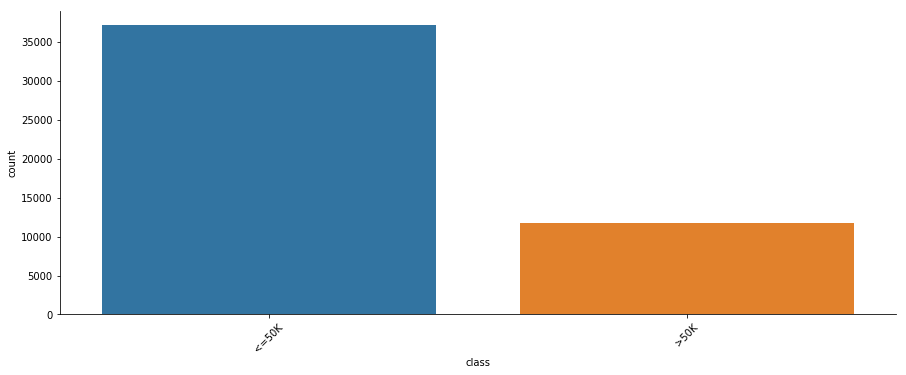

In [10]:
sns.catplot(x='class', kind='count', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

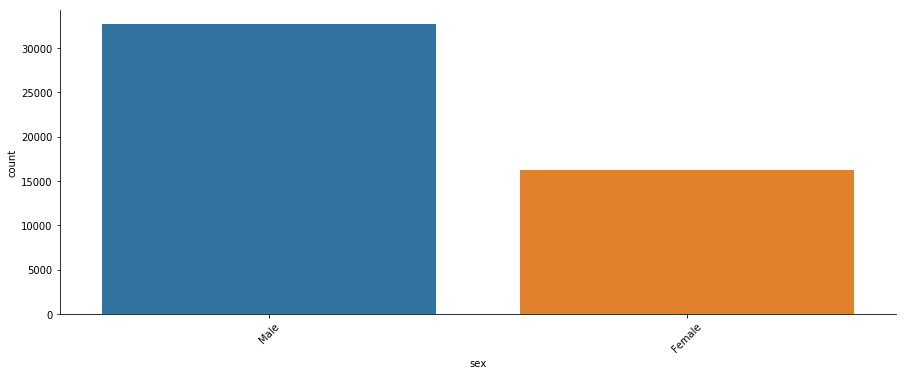

In [11]:
sns.catplot(x='sex', kind='count', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

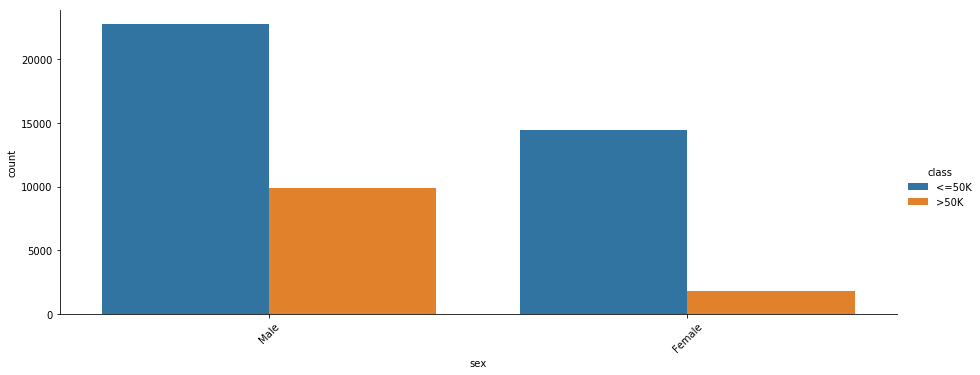

In [12]:
sns.catplot(x='sex', kind='count', hue='class', data=data, aspect=2.5, )
plt.xticks(rotation=45)
plt.show()

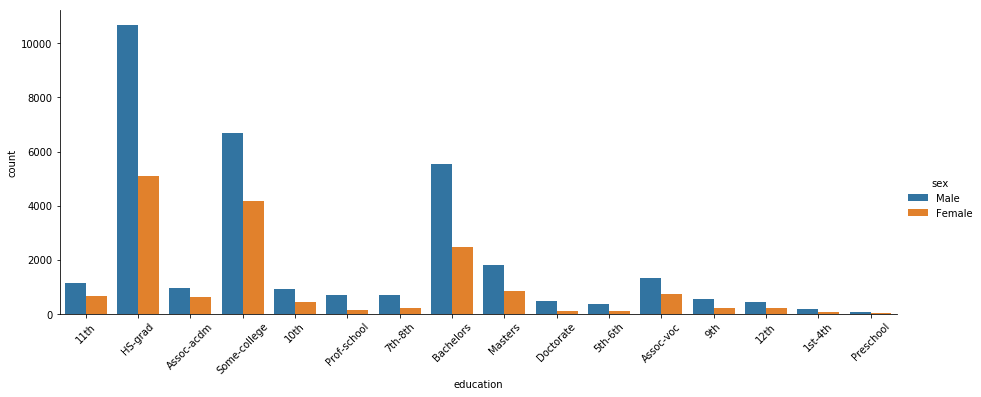

In [13]:
sns.catplot(x='education', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

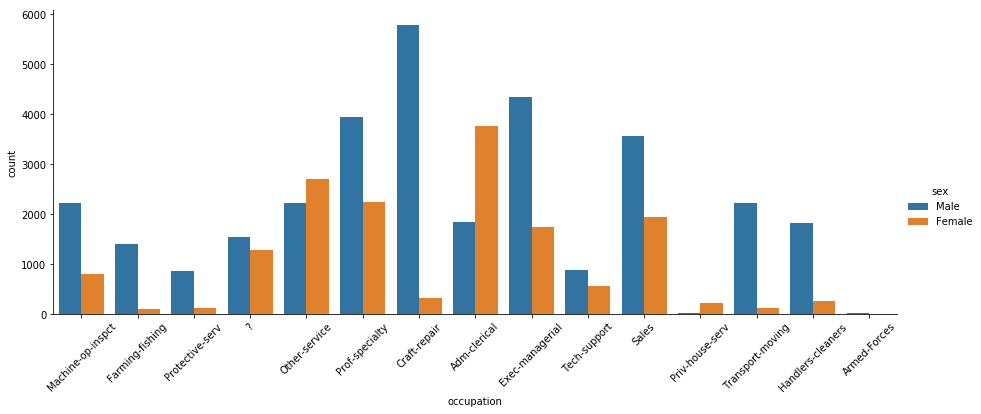

In [14]:
sns.catplot(x='occupation', kind='count', hue='sex', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

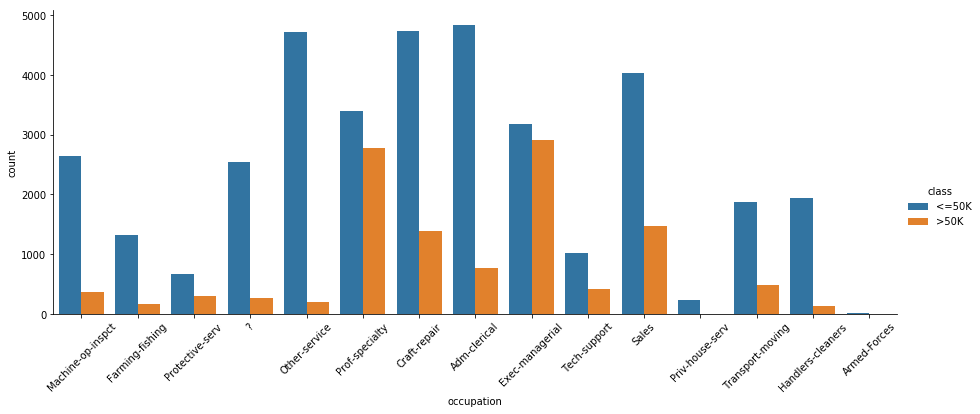

In [15]:
sns.catplot(x='occupation', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

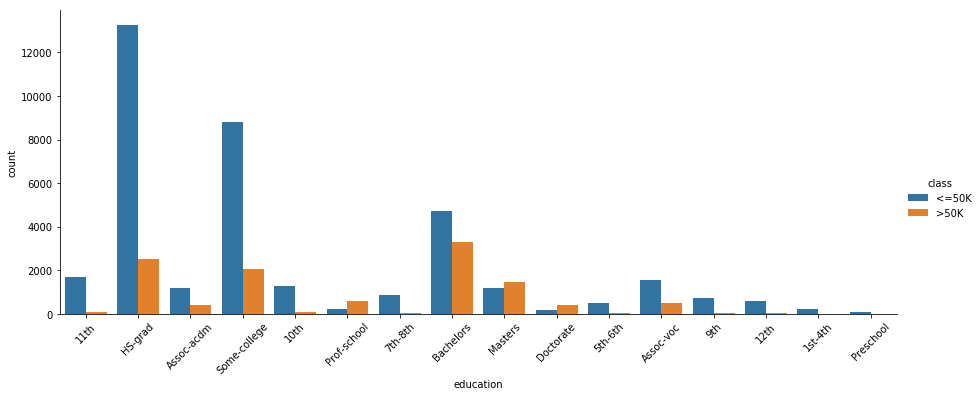

In [16]:
sns.catplot(x='education', kind='count', hue='class', data=data, aspect=2.5)
plt.xticks(rotation=45)
plt.show()

# Classification modeling

In this section, we will create classification models using K-nearest neighbors and Decision Tree models.


### Setting up the data for modeling

In [17]:
def encode_cat_labels(df, cols=None):
    new_df = df.copy()
    refs = {}
    
    if cols == None:
        cols = [col for col in data.columns if data[col].dtype == 'object']
    
    for col in cols:
        le = preprocessing.LabelEncoder()
        le.fit(data[col])
        new_df[col] = le.transform(new_df[col])
        refs[col] = {k:v for (k,v) in zip(le.classes_, le.transform(le.classes_))}
    return new_df, refs

In [18]:
def calc_metrics(labels, preds, beta=0.5):
    
    metrics = {
        "precision": precision_score(labels, preds),
        "recall" : recall_score(labels, preds),
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds),
        "f_b": fbeta_score(labels, preds, beta=beta),
        "error": np.mean(labels != preds)
    }
    return metrics

In [19]:
# Get all of the string columns within the dataframe
cols = [col for col in data.columns if data[col].dtype == 'object']
model_df, col_refs= encode_cat_labels(data, cols)

col_refs

{'workclass': {'?': 0,
  'Federal-gov': 1,
  'Local-gov': 2,
  'Never-worked': 3,
  'Private': 4,
  'Self-emp-inc': 5,
  'Self-emp-not-inc': 6,
  'State-gov': 7,
  'Without-pay': 8},
 'education': {'10th': 0,
  '11th': 1,
  '12th': 2,
  '1st-4th': 3,
  '5th-6th': 4,
  '7th-8th': 5,
  '9th': 6,
  'Assoc-acdm': 7,
  'Assoc-voc': 8,
  'Bachelors': 9,
  'Doctorate': 10,
  'HS-grad': 11,
  'Masters': 12,
  'Preschool': 13,
  'Prof-school': 14,
  'Some-college': 15},
 'marital-status': {'Divorced': 0,
  'Married-AF-spouse': 1,
  'Married-civ-spouse': 2,
  'Married-spouse-absent': 3,
  'Never-married': 4,
  'Separated': 5,
  'Widowed': 6},
 'occupation': {'?': 0,
  'Adm-clerical': 1,
  'Armed-Forces': 2,
  'Craft-repair': 3,
  'Exec-managerial': 4,
  'Farming-fishing': 5,
  'Handlers-cleaners': 6,
  'Machine-op-inspct': 7,
  'Other-service': 8,
  'Priv-house-serv': 9,
  'Prof-specialty': 10,
  'Protective-serv': 11,
  'Sales': 12,
  'Tech-support': 13,
  'Transport-moving': 14},
 'relationshi

In [20]:
model_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [21]:
target_name = 'class'
try:
    target = model_df[target_name]
    model_df.drop(labels=target_name, inplace=True, axis=1)
except:
    print(f'The target: {target_name}, has already been dropped from the dataframe')
    print(model_df.columns)

### Train Test Split

In [22]:
##Setting up the train_test split
x_train, x_test,y_train, y_test = train_test_split(model_df, 
                                                    target, test_size=0.35, random_state=42)

# Instantiate StandardScaler
scaler = preprocessing.StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(x_train)
scaled_data_test = scaler.transform(x_test)

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


#### Further investigation into the nature of the data

In [23]:
x_train.shape, x_test.shape
sns.barplot()

((31747, 14), (17095, 14))

In [24]:
## Based on the info below, most of the rows are 0 in our train data
zero_count = np.where(y_train == 0)[0].shape[0]
one_count = y_train.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in y_train: {y_train.shape[0]}")

Total rows with 0: 	24087
Total rows with 1:  	7660
Total rows in y_train: 31747


In [25]:
zero_count = np.where(y_test == 0)[0].shape[0]
one_count = y_test.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in y_test:  {y_test.shape[0]}")

Total rows with 0: 	13068
Total rows with 1:  	4027
Total rows in y_test:  17095


In [26]:
## Based on the information below, our dataset is highly imbalanced
zero_count = np.where(target == 0)[0].shape[0]
one_count = target.shape[0] - zero_count
print(f"Total rows with 0: \t{zero_count}")
print(f"Total rows with 1:  \t{one_count}")
print(f"Total rows in target:  {target.shape[0]}")

Total rows with 0: 	37155
Total rows with 1:  	11687
Total rows in target:  48842


Here, we are using PCA to break down the data into two principle components, so that the data maybe plotted to see if there are any trends or patterns available that may have an impact on the performance of our models.  

In the following cells below, we will graph the data before and after applying the standardized scalar fro scikit learn

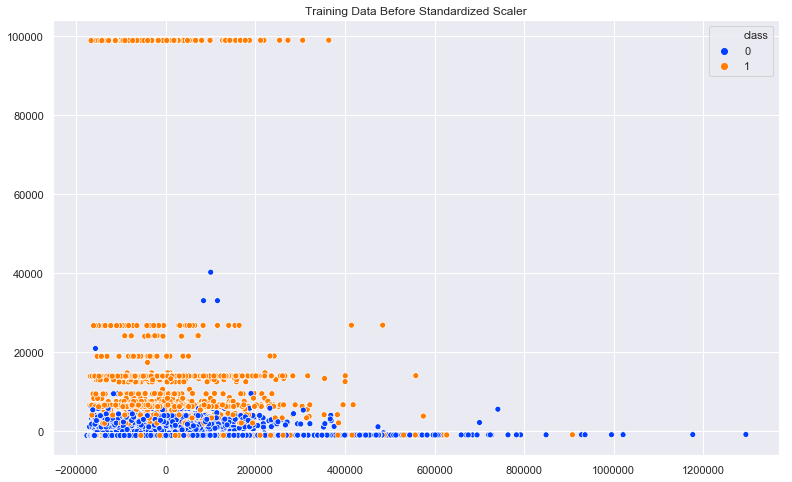

In [120]:
### PCA Plot
sns.set(rc={'figure.figsize':(13,8)})

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_values = pca.fit_transform(x_train)

sns.scatterplot(x=pca_values[:,0], y=pca_values[:,1], hue=y_train, palette='bright')
plt.title('Training Data Before Standardized Scaler')
plt.show()

In the graph above, there seems to be a fair amount of separation between the different classes we are attempting to predict.

After transforming the data, it becomes more visible that there is a high level of correlation between the different targets that we are attempting to predict.

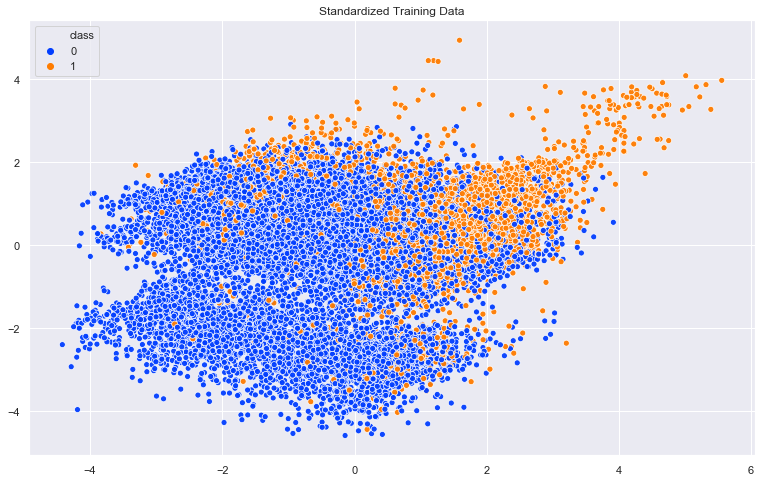

In [121]:
### PCA Plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

pca_values = pca.fit_transform(scaled_data_train)

sns.scatterplot(x=pca_values[:,0], y=pca_values[:,1], hue=y_train, alpha=0.95, palette='bright')
plt.title('Standardized Training Data')
plt.show()

Now that the data transformation is complete, the next step is to generate the learning models and see how the scaling affects the models.

## K-nearest neighbors modeling

In [27]:
def generate_knn(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    neighbors = [] # list to hold metrics of the neighbors
    for k in range(min_k, max_k+1):
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        preds = clf.predict(X_test)
        metrics = calc_metrics(labels=y_test, preds=preds)
        
        metrics['k'] = k # append k_value to the calculated metrics
        neighbors.append(metrics)
          
    return neighbors

In [28]:
def graph_knn_metrics(list_of_neighbors, fsize=(15,8)):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_neighbors:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
    
    # Graph the values within the list
    for key in keys:
        if key != 'k':
            plt.figure(figsize=fsize)
            plt.plot(graphs['k'], graphs[key], color='red', linestyle='dashed', marker='o',
                     markerfacecolor='blue', markersize=10)
            plt.grid()
            plt.title(f'{key.upper()}')
            plt.xlabel('K Value')
            plt.ylabel('Score')

#### Baseline model without feature scaling

There is an upward and downward trend in our graphs. This is the result of low correlation in our untransformed, train-test split

In [29]:
list_of_neighbors = generate_knn(x_train, y_train, x_test, y_test, max_k=50)

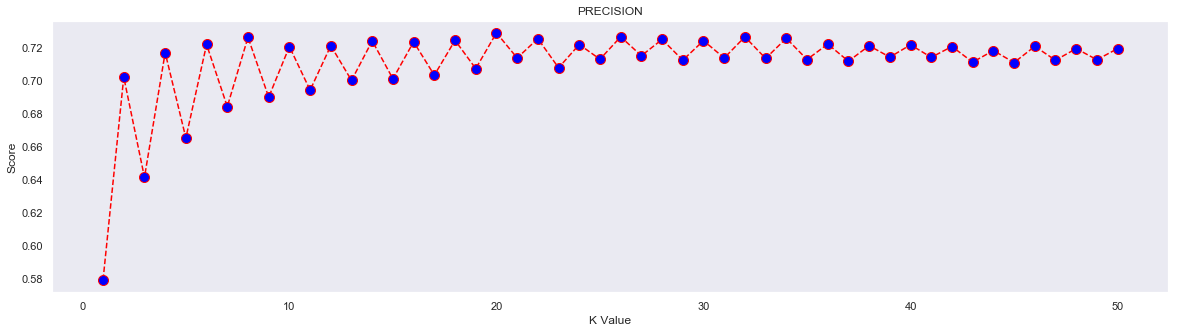

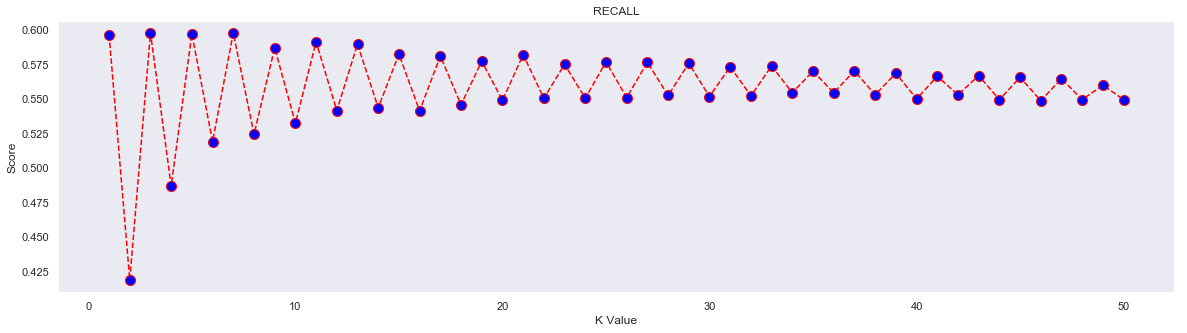

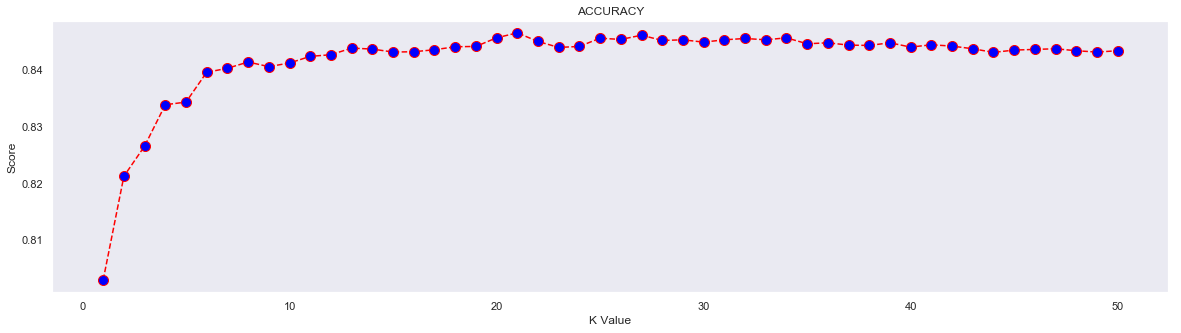

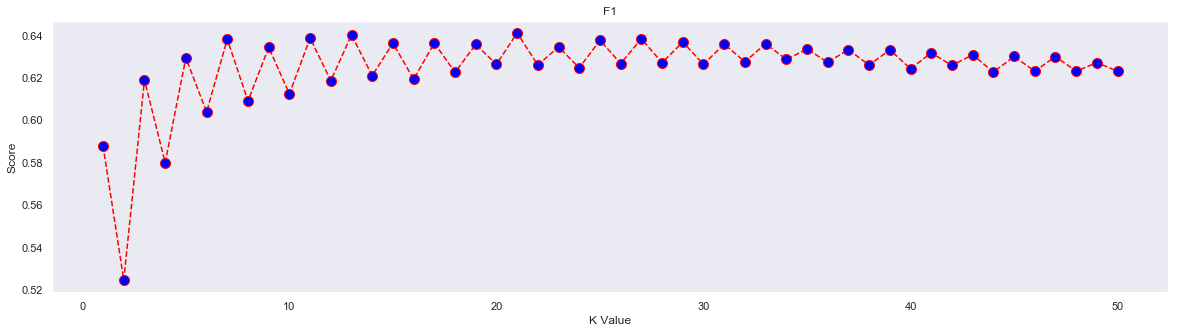

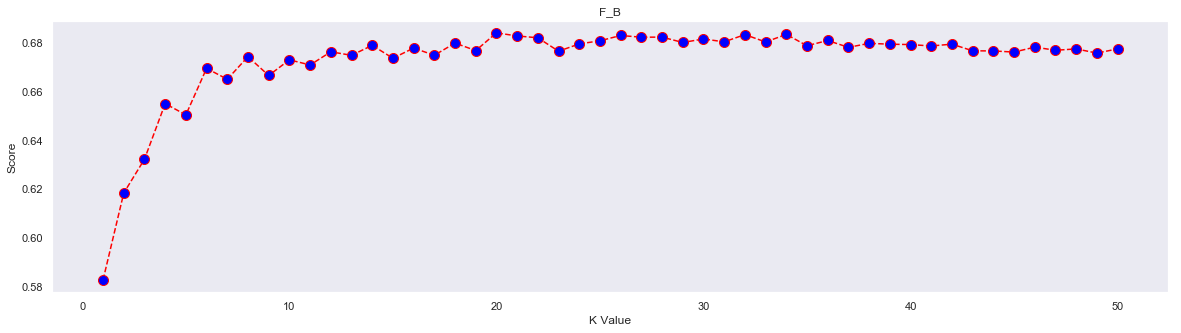

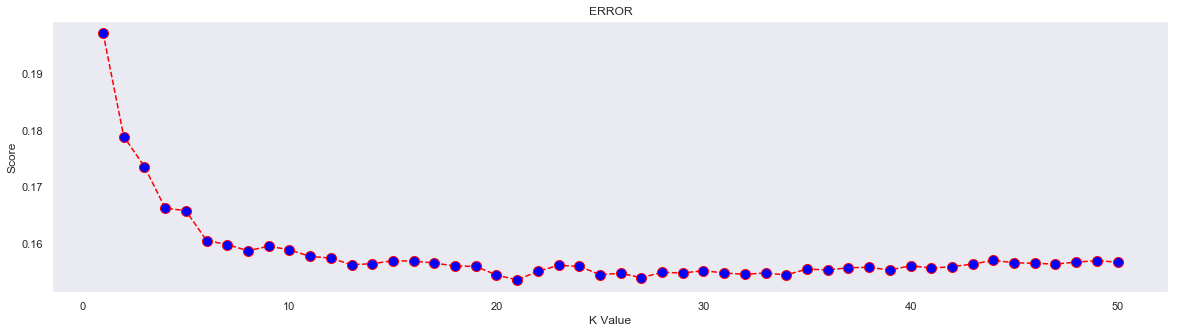

In [125]:
graph_knn_metrics(list_of_neighbors, fsize=(20,5))

#### Model with feature scaling

By introducing feature scaling, the results of our KNN model has had an overall increase in the different metrics used.
It was interesting to see that the precision of the model began to plateau as a result of the introduction of scaling our training data and the results of the model are more consistent now.  

In [32]:
list_of_neighbors = generate_knn(scaled_data_train, y_train, scaled_data_test, y_test, max_k=50)

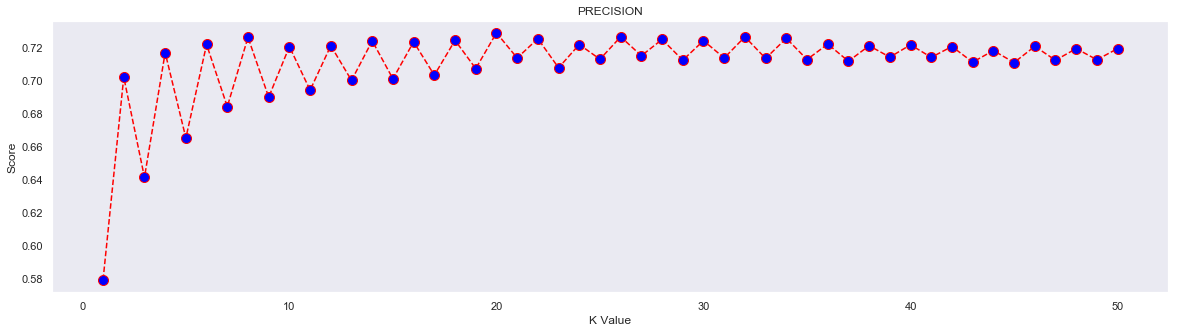

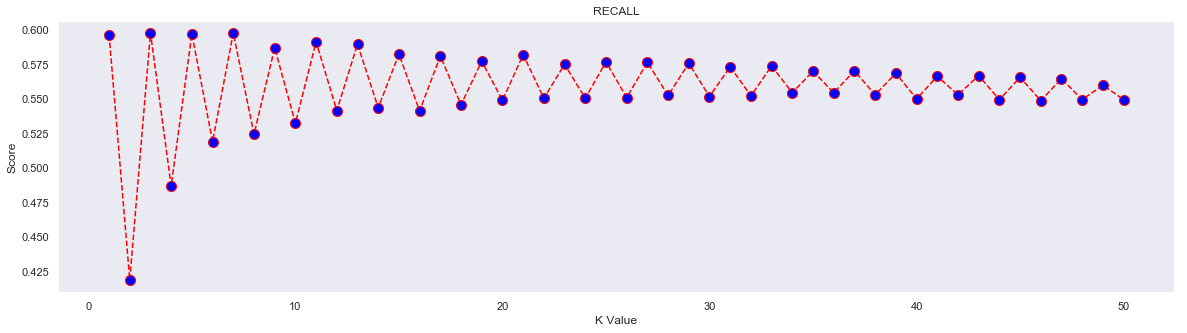

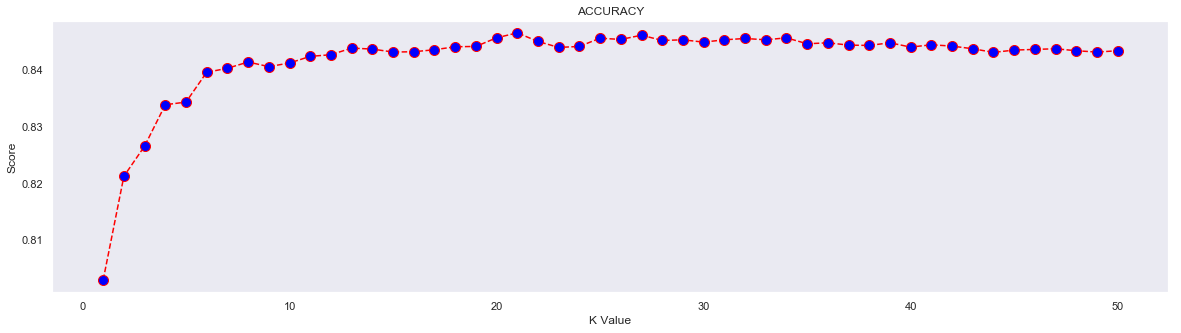

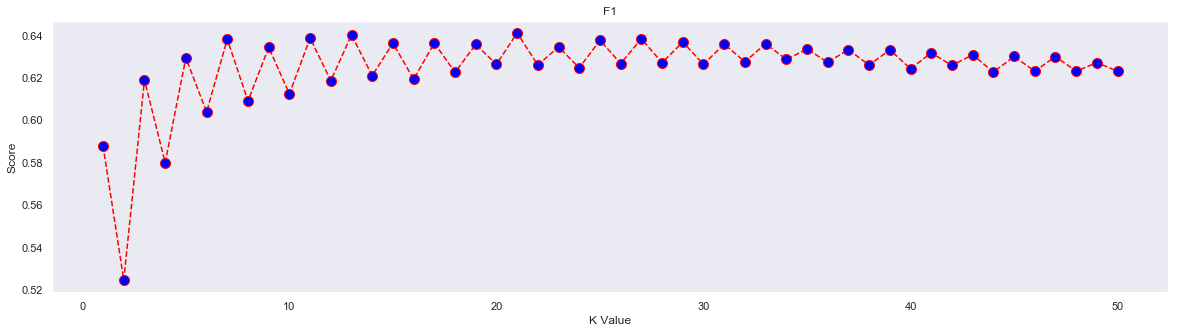

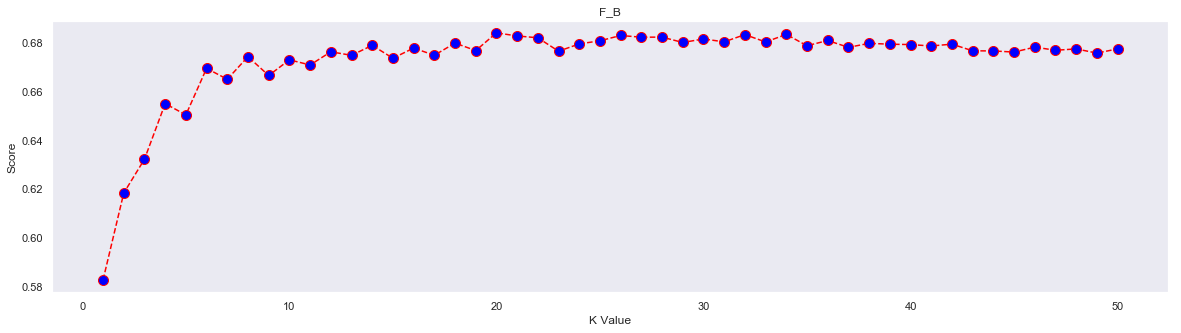

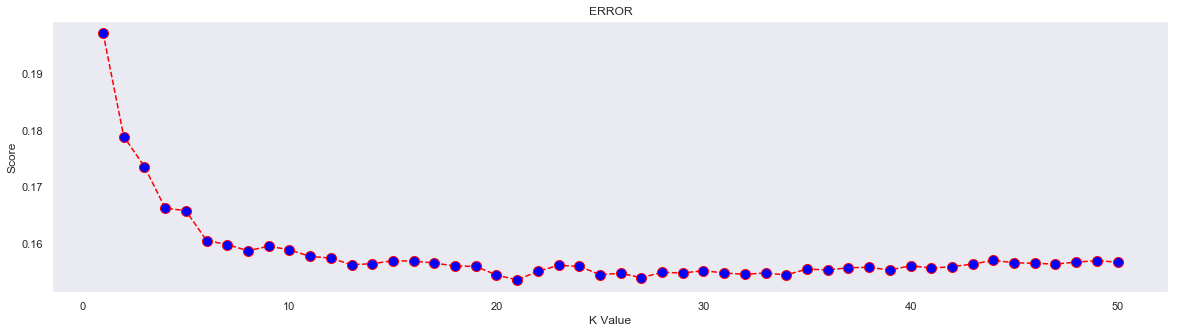

In [124]:
graph_knn_metrics(list_of_neighbors, fsize=(20,5))

## Decision Tree Modeling

In this section, we will setup a base decision tree and also attempt to increase the performance of the tree via the following hyper parametres: `max_depth` and `max_features`

#### Base decision tree

In [35]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)
y_preds = clf.predict(x_test)
calc_metrics(y_test, y_preds)

{'precision': 0.6092825005919962,
 'recall': 0.6389371740749938,
 'accuracy': 0.8184264404796724,
 'f1': 0.6237575757575757,
 'f_b': 0.614991156365027,
 'error': 0.18157355952032758}

### Decision Tree with hyper parameter tunning: `max_features` 

In [36]:
def graph_dt_metrics(list_of_metrics, fsize=(15,8), title='', x_label=''):
    graphs = {}
    
    # Pull the values from the dictionaries and store in list format
    for item in list_of_metrics:
        keys =  item.keys()
        for key in keys:
            if key in graphs:
                graphs[key].append(item[key])
            else:
                graphs[key] = [item[key]]
        
    # Graph the values within the list
    for key in keys:
        plt.figure(figsize=fsize)
        plt.plot(range(1, len(graphs[key])+1), graphs[key], color='blue', linestyle='dashed', marker='o',
                 markerfacecolor='red', markersize=10)
        plt.grid()
        plt.title(f'{title}\n{key.upper()}')
        plt.xlabel(x_label)
        plt.ylabel('score')
        plt.show()

In [37]:
max_feat_metrics = []
for i in range(1, len(model_df.columns)+1 ):
    clf = DecisionTreeClassifier(criterion='entropy', max_features=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    max_feat_metrics.append(calc_metrics(y_test, y_preds))

max_feat_metrics

[{'precision': 0.6017848528702364,
  'recall': 0.6195679165631984,
  'accuracy': 0.8138052062006434,
  'f1': 0.6105469227945676,
  'f_b': 0.6052593275435447,
  'error': 0.18619479379935655},
 {'precision': 0.6103801169590644,
  'recall': 0.6220511547057362,
  'accuracy': 0.8174319976601345,
  'f1': 0.6161603738777519,
  'f_b': 0.612679156679548,
  'error': 0.18256800233986545},
 {'precision': 0.6125363020329139,
  'recall': 0.6285075738763347,
  'accuracy': 0.8188359169347762,
  'f1': 0.6204191690158108,
  'f_b': 0.6156652882510338,
  'error': 0.18116408306522375},
 {'precision': 0.6158699344819218,
  'recall': 0.6302458405761112,
  'accuracy': 0.8202983328458614,
  'f1': 0.6229749631811488,
  'f_b': 0.6186924089512945,
  'error': 0.17970166715413863},
 {'precision': 0.6154594069032572,
  'recall': 0.6287558976905885,
  'accuracy': 0.8200058496636443,
  'f1': 0.6220366048397001,
  'f_b': 0.6180735243860762,
  'error': 0.17999415033635566},
 {'precision': 0.6131178707224335,
  'recall':

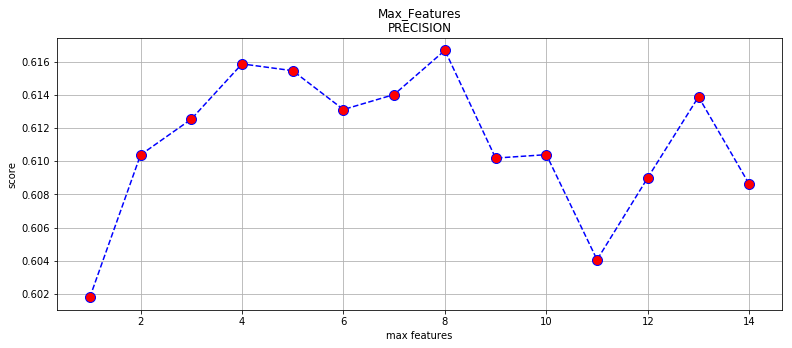

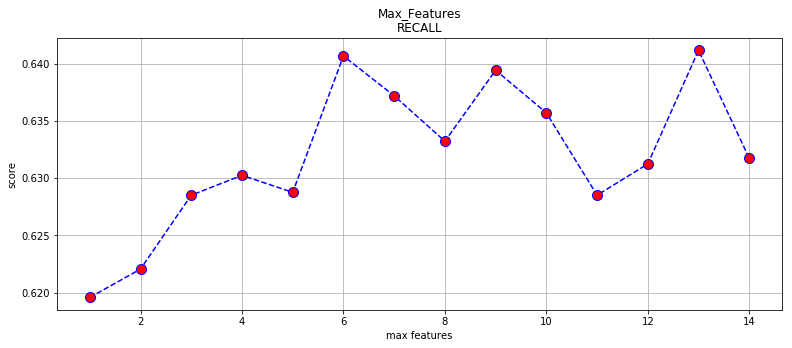

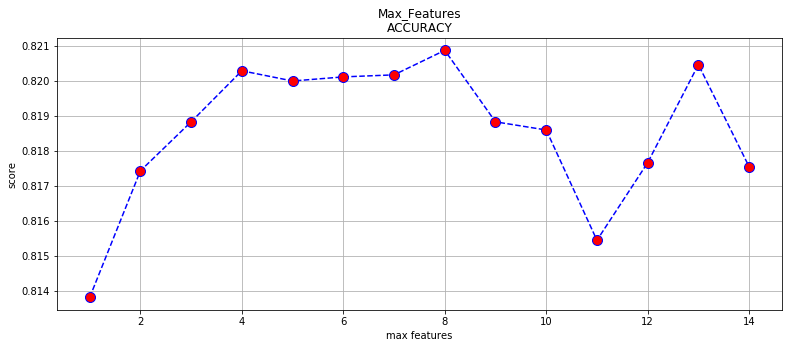

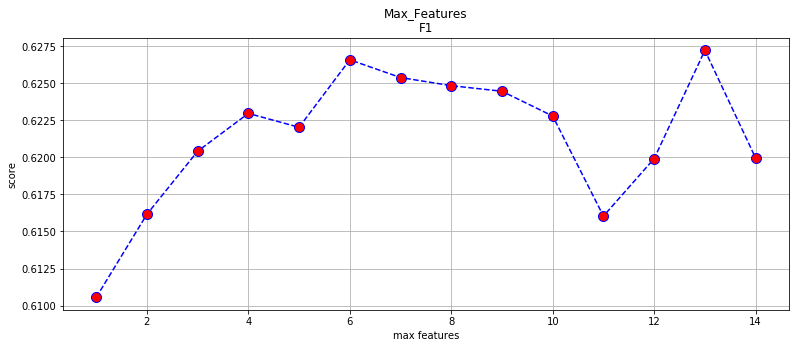

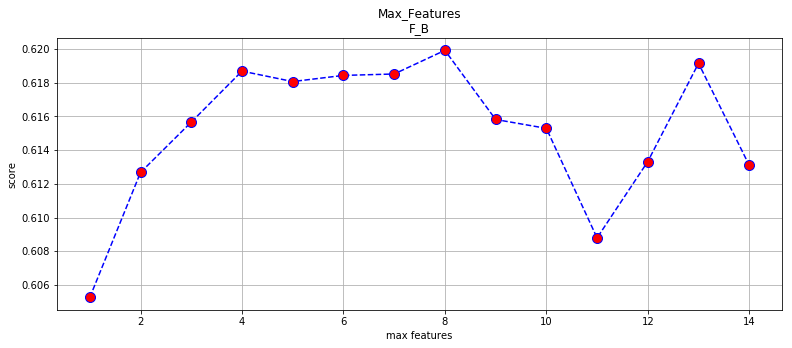

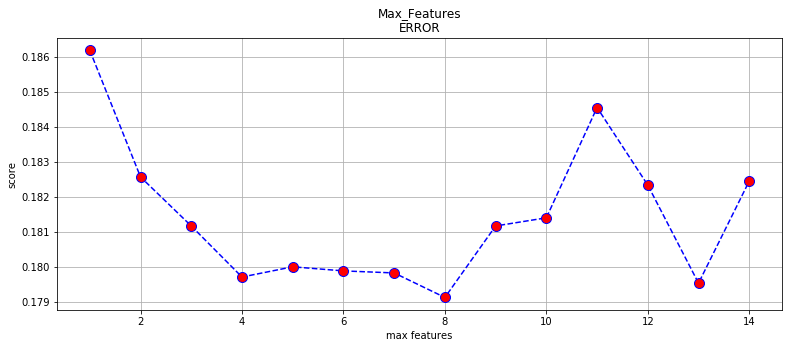

In [38]:
graph_dt_metrics(max_feat_metrics, fsize=(13,5), title='Max_Features', x_label='max features')

### Decision Tree hyper parameter tunning: `max_depth`

In [39]:
max_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    max_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


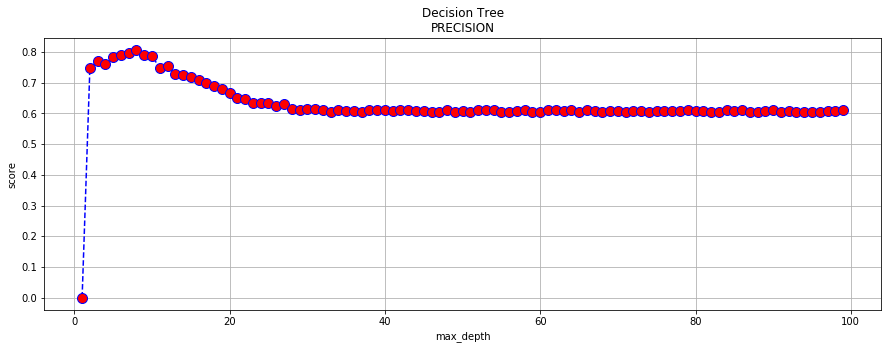

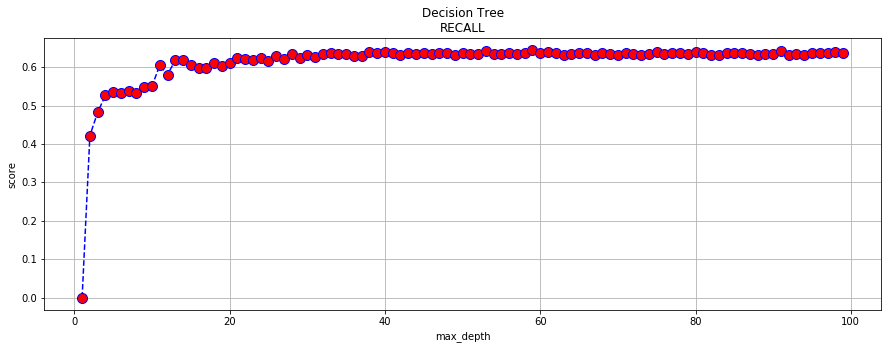

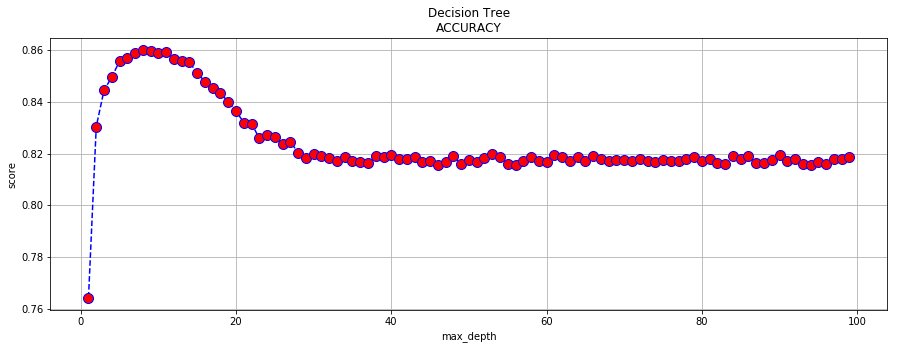

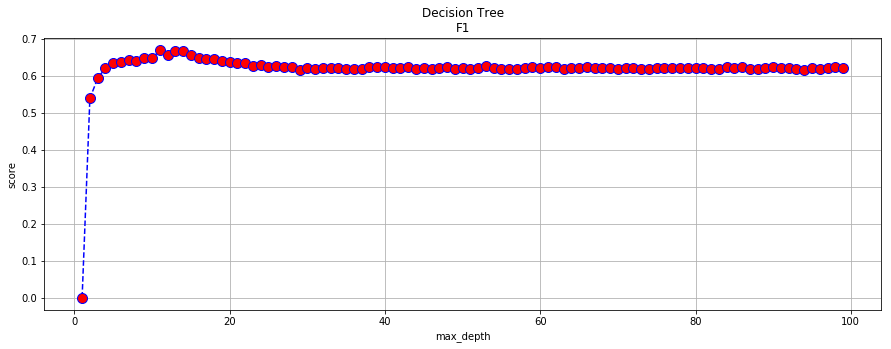

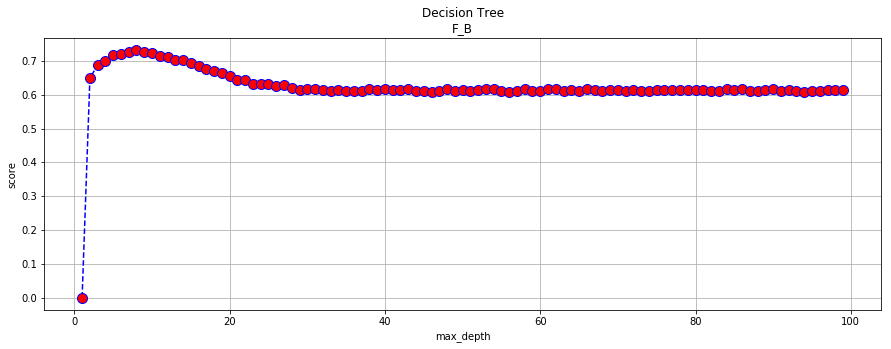

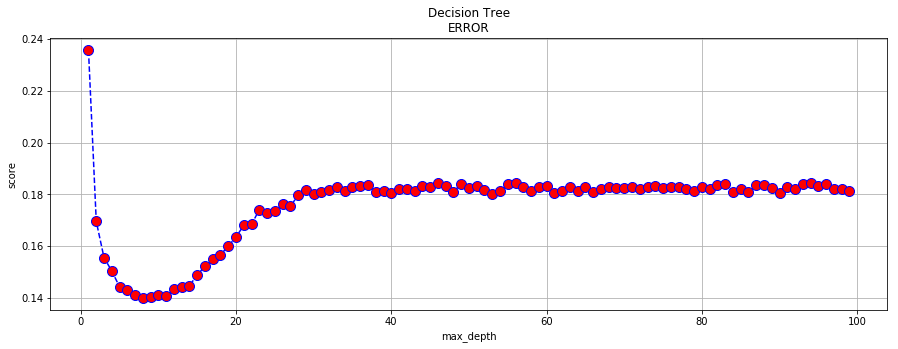

In [40]:
graph_dt_metrics(max_depth_metrics, fsize=(15,5), title='Decision Tree', x_label='max_depth')

### Decision tree hyper parameter tunning: `max_features: 12` & `max_depth`

In [41]:
feat_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=12)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    feat_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


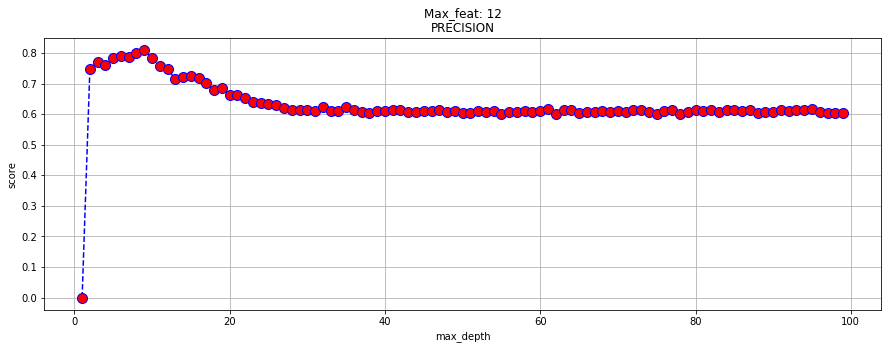

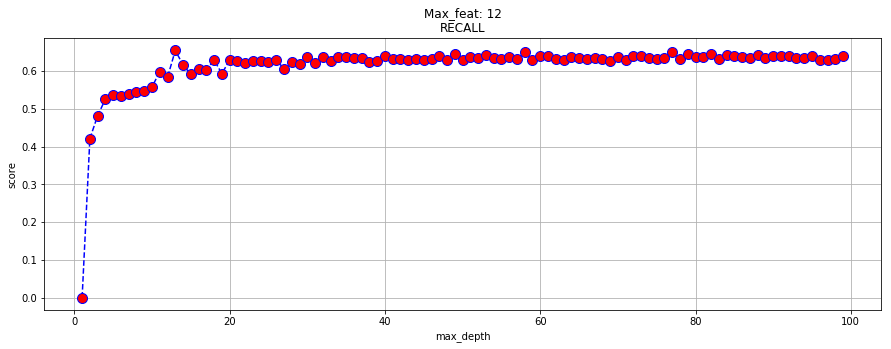

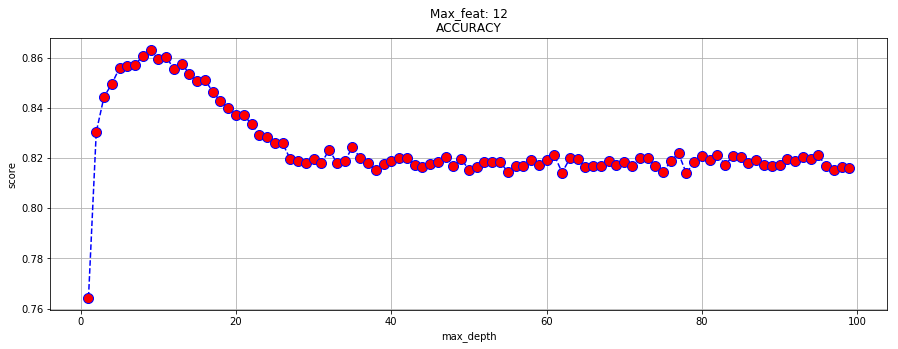

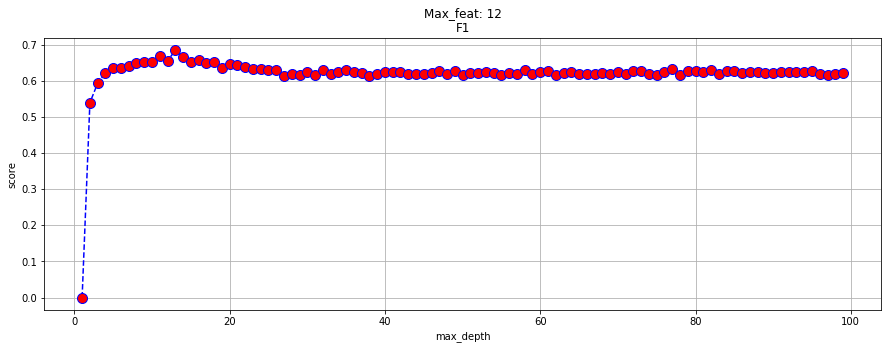

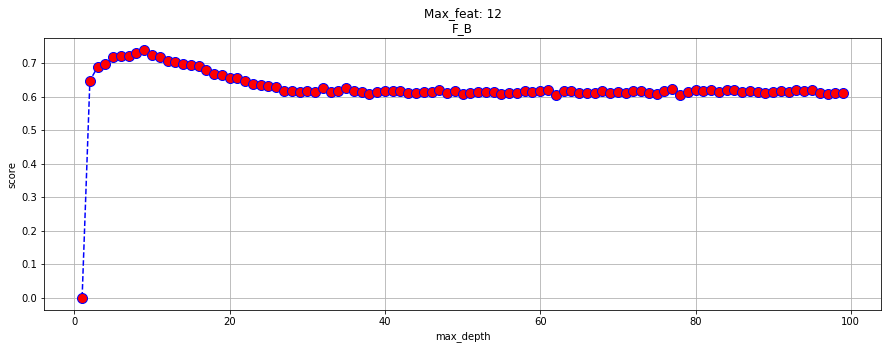

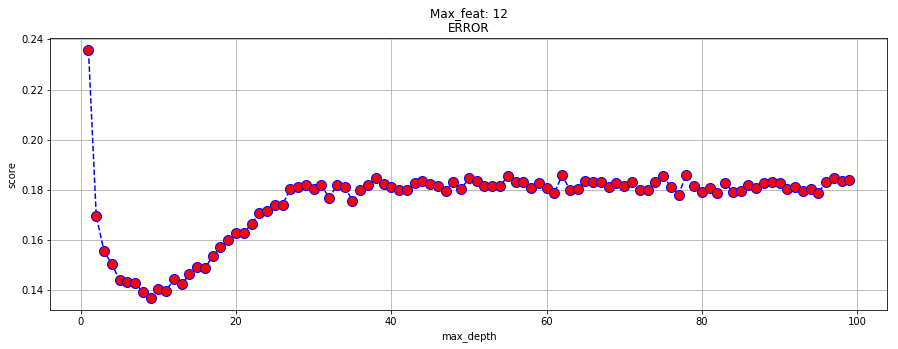

In [42]:
graph_dt_metrics(feat_depth_metrics, title="Max_feat: 12", x_label='max_depth', fsize=(15,5))

In [43]:
feat_depth_metrics[10]

{'precision': 0.7569771088115397,
 'recall': 0.5994536876086417,
 'accuracy': 0.86031003217315,
 'f1': 0.6690687361419069,
 'f_b': 0.719180122743252,
 'error': 0.13968996782684995}

### Decision Tree Tuning using max_features: 9 & max_depth

In [44]:
feat_depth_metrics = []
for i in range(1, 100):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=i, max_features=9)
    clf.fit(x_train, y_train)
    y_preds = clf.predict(x_test)

    feat_depth_metrics.append(calc_metrics(y_test, y_preds))

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


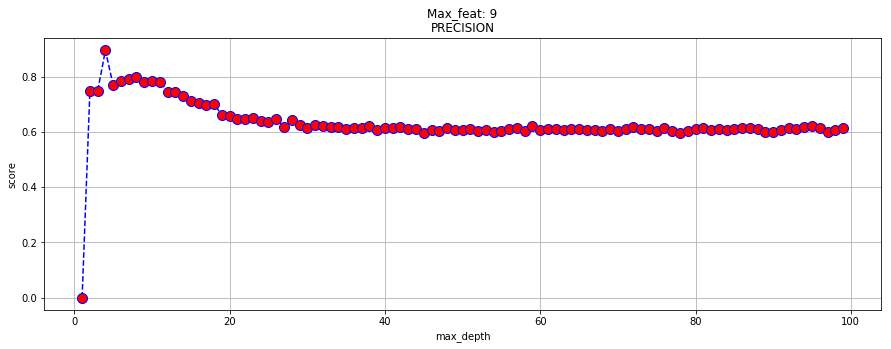

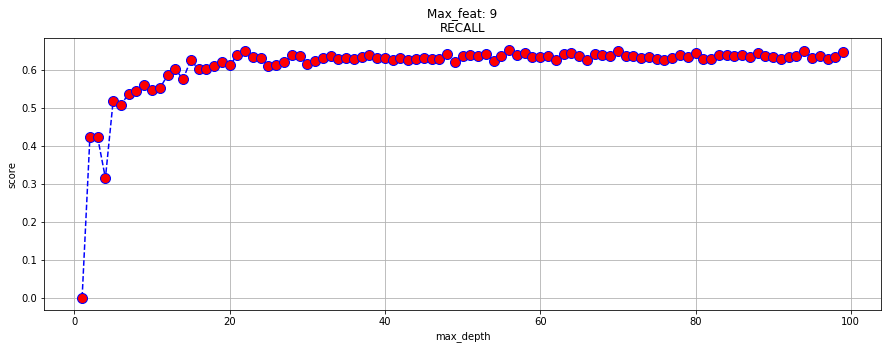

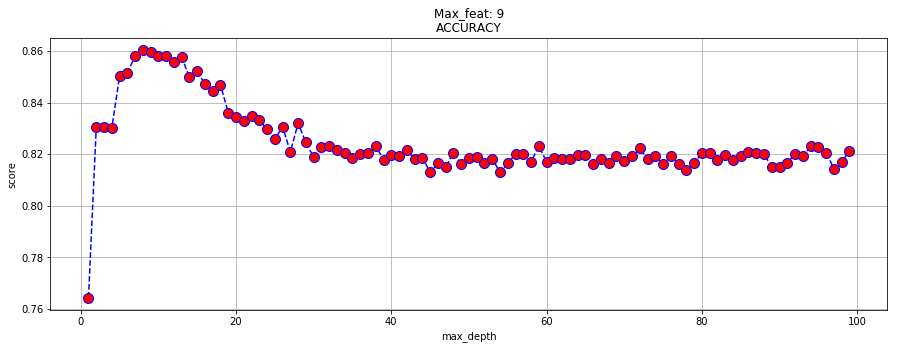

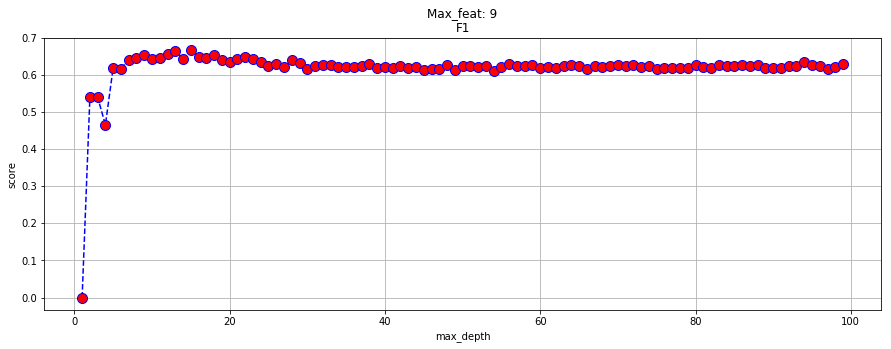

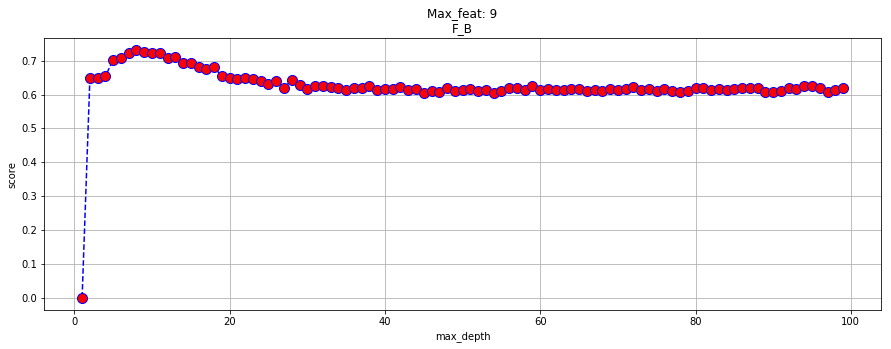

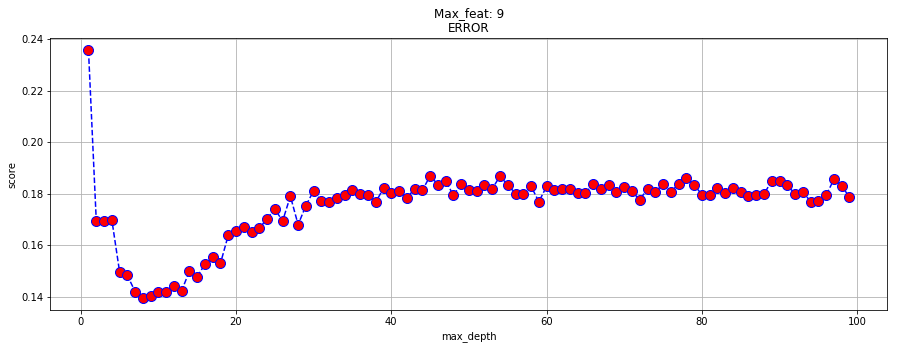

In [45]:
graph_dt_metrics(feat_depth_metrics, title="Max_feat: 9", x_label='max_depth', fsize=(15,5))

## SVM Machines

Here, we are using SVM machines to generate another model, to see if it can potentially outperform our Decision Tree and KNN.  
This was added for fun and as a means to further practice modeling with `sklearn`.

In [126]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC(gamma='auto')
clf.fit(scaled_data_train, y_train)
y_preds = clf.predict(scaled_data_test)

In [127]:
calc_metrics(labels=y_test, preds=y_preds)

{'precision': 0.7658355795148248,
 'recall': 0.5644400297988577,
 'accuracy': 0.8567417373501024,
 'f1': 0.6498927805575411,
 'f_b': 0.7148248317504245,
 'error': 0.14325826264989763}

**NOTE:**
The following line of code, may take somewhere between 1 - 3 hrs to run
The best result from the code below were seen with the combinations below

* [CV]  C=1000, gamma=0.01, kernel=rbf, score=0.8458849097609373, total= 2.3min
* [CV]  C=100, gamma=0.01, kernel=rbf, score=0.8453978453978453, total=  30.3s

In [129]:
from sklearn.model_selection import GridSearchCV

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(scaled_data_train, y_train)

# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

C:\Users\Rahkeem\Anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7827648114901257, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7838782838782838, total= 1.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.3min remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7831222831222832, total= 1.4min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8285930265520174, total=  20.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8374598374598374, total=  19.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8326403326403327, total=  22.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8116791080034017, total=  21.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8085428085428086, total=  23.9s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.8175203175203175, total=  24.6s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8110943110943111, total=  23.7s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8133623133623133, total=  23.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7829537938202779, total= 6.3min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7886977886977887, total= 4.7min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.7883197883197883, total= 5.2min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8141358782953794, total= 7.1min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8178983178983179, total= 6.9min
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 105.7min finished


{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [132]:
# print best parameter after tuning 
print(grid.best_params_) 
  

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [133]:
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


# Summary

In this project, we sought to create a classification model using K-Nearest Neighbors and Decision Trees.  The packages used to implement these models was `sklearn`.

### KNN

The first model that was generated was KNN. This model is initally gave some what seemed to be strange results when passing in non-transformed data.  There were both upward and downward trends within the data that was caused by low correlation between the different target classes that were being predicted.  Once the data was transformed, the overall performance of the model increased and the results were more consistent than before.

### Decision Trees 

The best overall results within our Decision Tree Modeling utilized the following hyper parameters: `max_depth: 11` & `max_features: 12`. It is important to note that this tree did not have the highest score in each respective measure.  As different combinations were added, some measure increased, while others decreased. The decision was made to pick the tree with the smallest overall margin of change in the measures used.  

We used an iterative process to find the best combination of these hyper parameters that would give us an optimum decision tree. Although there are many combinations of hyper parameters that could be used, we decided to only use max_depth and max_features, to simplify the project.

Below are the overall scores of the decision

In [46]:
feat_depth_metrics[10]

{'precision': 0.782716049382716,
 'recall': 0.5510305438291532,
 'accuracy': 0.8582041532611875,
 'f1': 0.6467502185951617,
 'f_b': 0.7220016919372682,
 'error': 0.14179584673881251}

### Conclusion

The Decision Tree that resulted from our hyper parameter tunning that gave the overall best performance and the most consistent results.  Our KNN Model has some very interesting results and unexpected results that were influenced by the scaling of the data. We were able to accurately predict a little over 86% of the data accurately, using Decision Trees, withouth losing much with the other metrics used.

## Future Works

Possible future addition, or editions, to this project include the following:
* Pulling more recent data to see how demographics have increased over the years
* Web scrapping with the census bureau website to automatically update the data used.